### 8. Znajdowanie stanu stacjonarnego - macierzowe

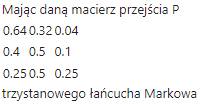

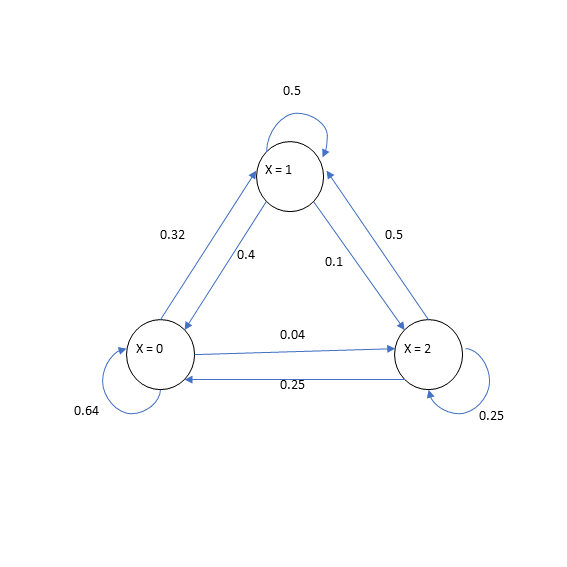

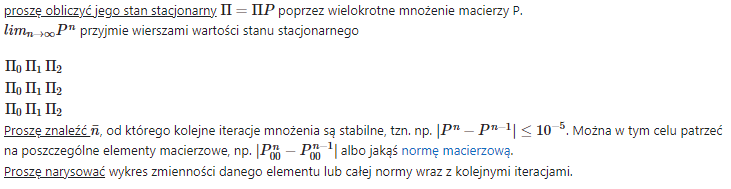

In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
P = np.array([
    [0.64, 0.32, 0.04],
    [0.4, 0.5, 0.1],
    [0.25, 0.5, 0.25]
]) # 3x3 matrix

err = 999
power = 1

norms = []
P_current = P.copy()
norms.append(np.linalg.norm(P_current))

while err > 1e-5:
    P_prev = P_current.copy()
    P_current = P_current @ P # or maybe raise P to a specific power using linalg.matrix_power
    power += 1
    # err = np.abs(P_current[0,0]-P_prev[0,0])
    err = np.linalg.norm(P_current - P_prev) # Frobenius norm: https://mathworld.wolfram.com/FrobeniusNorm.html#:~:text=The%20Frobenius%20norm%2C%20sometimes%20also,considered%20as%20a%20vector%20norm.
    norms.append(np.linalg.norm(P_current))
    print(f"power: {power}, err: {err}")
    # print(P_current[0,0], P_prev[0,0])
print(P_current)

power: 2, err: 0.2708543150846964
power: 3, err: 0.08510260563578533
power: 4, err: 0.02623591688576178
power: 5, err: 0.007942946523512432
power: 6, err: 0.0023896050841627657
power: 7, err: 0.0007174924420644322
power: 8, err: 0.0002153028769094642
power: 9, err: 6.459583042184822e-05
power: 10, err: 1.9379196305672427e-05
power: 11, err: 5.813799140999651e-06
[[0.5102048  0.40816283 0.08163236]
 [0.51020354 0.40816359 0.08163287]
 [0.51020227 0.40816435 0.08163338]]


N, od którego kolejne mnożenia są stabilne, to N=11. Kryterium stabilności, które przyjąłem, to err < 1e-5, gdzie err to norma Frobeniusa różnicy macierzy poprzedniej i macierzy bieżącej.

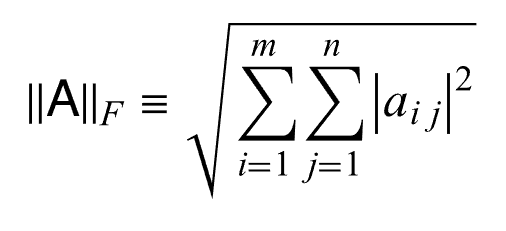

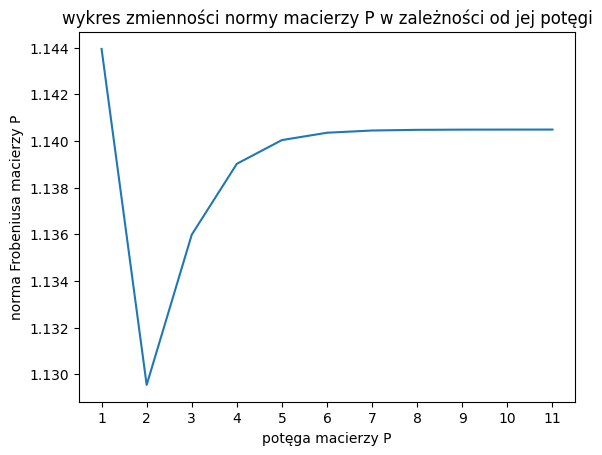

In [ ]:
# RuntimeError: matplotlib does not support generators as input :(
x_ticks = [i+1 for i in range(len(norms))]
plt.plot(x_ticks, norms)
plt.xlabel("potęga macierzy P")
plt.ylabel("norma Frobeniusa macierzy P")
plt.xticks(x_ticks)
plt.title("wykres zmienności normy macierzy P w zależności od jej potęgi");